In [1]:
# Load Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
# Print out the names of the features (X) and the name of the target (y)
X = data.feature_names
y = data.target_names

In [3]:
print(X)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Allocate 80% of the data to training set and the remaining 20% to test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.8, test_size=0.2, random_state=0)

In [5]:
# Train a decision tree from the Training set (use "entropy" as the criterion and fix the maximum depth of the tree as 2)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [6]:
# Predict and print out y_pred from X_test
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 0]


In [7]:
# Compute and print out the accuracy of the classifier by comparing y_pred and y_test
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9210526315789473

[Text(0.5, 0.8333333333333334, 'worst concave points <= 0.142\nentropy = 0.945\nsamples = 455\nvalue = [165, 290]'),
 Text(0.25, 0.5, 'worst perimeter <= 107.75\nentropy = 0.399\nsamples = 303\nvalue = [24, 279]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.133\nsamples = 269\nvalue = [5, 264]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.99\nsamples = 34\nvalue = [19, 15]'),
 Text(0.75, 0.5, 'worst perimeter <= 112.8\nentropy = 0.375\nsamples = 152\nvalue = [141, 11]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.948\nsamples = 30\nvalue = [19, 11]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 122\nvalue = [122, 0]')]

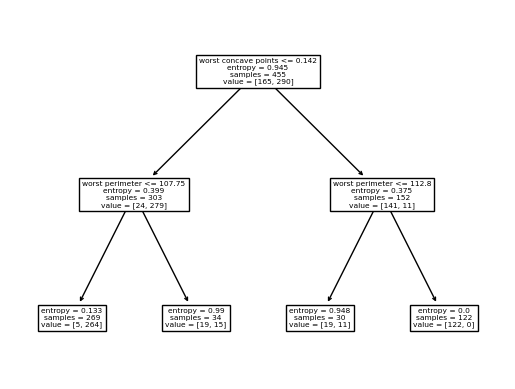

In [8]:
# Visualize the tree using sklearn.tree.plot_tree (each node of trees should include feature name)
from sklearn.tree import plot_tree

plot_tree(clf, feature_names=X)

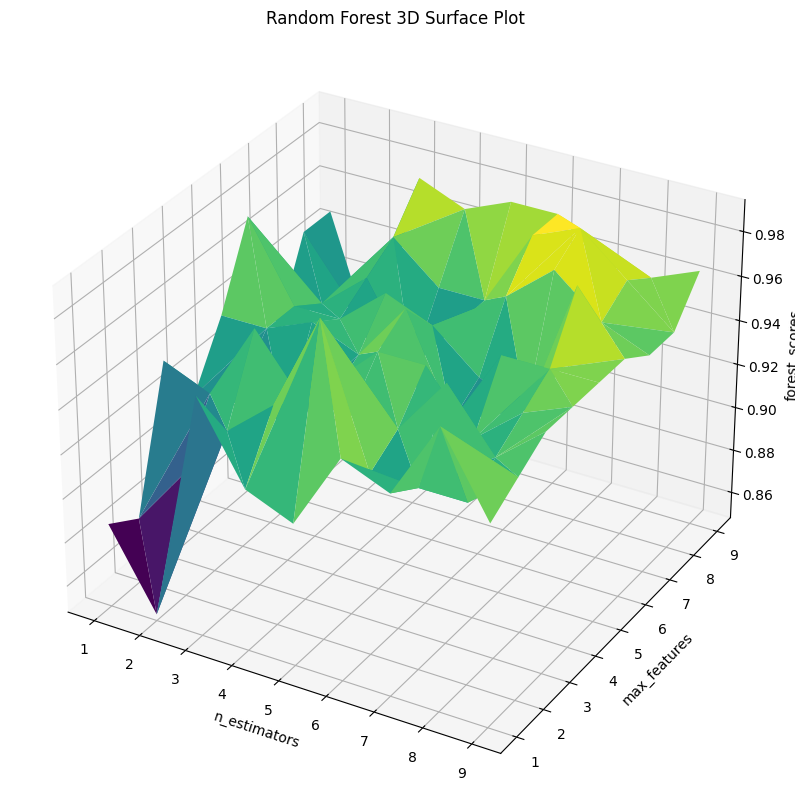

In [9]:
# Generates multiple decision trees using Random Forest

# Draw a 3D surface plot to visualize many forests
# X-axis: n_estimators, Y-axis: max_features, and Z-axis: score (mean accuracy on Test set)
# The plot should have more than 100 data points of different pair of X-axis and Y-axis values 
# (vary n_estimators and max_features to get around 100 different forests)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import random

n_estimators, max_features, forest_scores = [], [], []

for i in range(1, 10):
    for j in range(1, 10):
        random_forest = RandomForestClassifier(n_estimators=i, max_features=j)
        
        random_forest = random_forest.fit(X_train, y_train)
        forest_score = random_forest.score(X_test, y_test)

        forest_scores.append(forest_score)
        max_features.append(j)
        n_estimators.append(i)

plt.figure(figsize=(10, 10))

ax = plt.axes(projection = "3d")
ax.plot_trisurf(n_estimators, max_features, forest_scores, cmap='viridis')

ax.set_title("Random Forest 3D Surface Plot")

ax.set_xlabel("n_estimators")
ax.set_ylabel("max_features")
ax.set_zlabel("forest_scores")

plt.show()